In [1]:
# Project
# Project on Introduction to Neural Network and Deep Learning

In [2]:
# Part A
# Domain: Electronics and Telecommunication
# Project Objective: To build a classifier model which can use the given parameters to determine the signal strength or quality
# of the communications equipment of the communications equipment manufacturing company.

In [3]:
# Q 1(A)
# Read the ‘Signals.csv’ as DataFrame and import required libraries

In [4]:
# Solution
import pandas as pd
Signals = pd.read_csv('Signals.csv')
Signals = pd.DataFrame(Signals)

In [5]:
Signals.shape

(1599, 12)

In [6]:
# Importing the required libraries
import tensorflow as tf
tf.__version__

'2.3.0'

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [8]:
import time
start_time = time.time()  
import datetime
import math

In [9]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    from tensorflow.keras.utils import to_categorical
    from tensorflow.keras.models import load_model 
import tensorflow.keras.wrappers.scikit_learn 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import LeakyReLU

In [10]:
# Initialize the random number generator
import random
tensorflow.random.set_seed(7)
from random import shuffle

In [11]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Q 1(B)
# Check for missing values and print percentage for each attribute.

In [13]:
# Solution
Signals.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
# Computing the number/percentage of null values of the attributes
Signals = Signals.replace(r'^\s*$', np.nan, regex=True)
Missing = Signals.isna().sum()
Missing_Percentage = (Missing*100/Signals.shape[0]).round(2)
print('Missing values and percentages of missing values for each attribute are:\n',Missing.astype('str')
      +'('+ Missing_Percentage.astype('str')+'%)')

Missing values and percentages of missing values for each attribute are:
 Parameter 1        0(0.0%)
Parameter 2        0(0.0%)
Parameter 3        0(0.0%)
Parameter 4        0(0.0%)
Parameter 5        0(0.0%)
Parameter 6        0(0.0%)
Parameter 7        0(0.0%)
Parameter 8        0(0.0%)
Parameter 9        0(0.0%)
Parameter 10       0(0.0%)
Parameter 11       0(0.0%)
Signal_Strength    0(0.0%)
dtype: object


In [15]:
# Q 1(C)
# Check for presence of duplicate records in the dataset and impute with appropriate method

In [16]:
# Solution
duplicate = Signals.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 240


In [17]:
# Dropping the duplicate rows
Signals = Signals.drop_duplicates()

In [18]:
Signals.shape

(1359, 12)

In [19]:
# Q 1(D)
# Visualise distribution of the target variable.

In [20]:
# Solution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

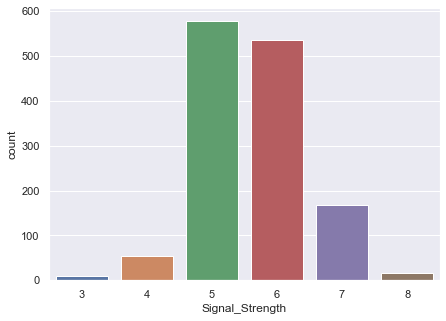

In [21]:
# In this case, the target variable is Signal_Strength
ax = plt.subplots(figsize = (7,5))   
sns.countplot(Signals.Signal_Strength,label = "Count")

<AxesSubplot:ylabel='Density'>

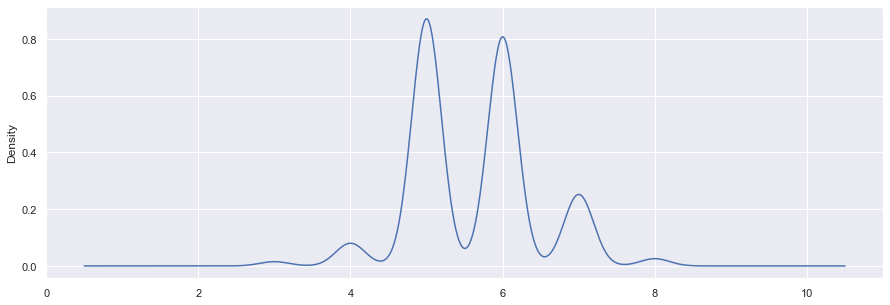

In [22]:
ax = plt.subplots(figsize = (15,5)) 
Signals.Signal_Strength.plot(kind = 'density') 

In [23]:
# Observation
# class 5 in 'Signal_Strength' has the highest count.

In [24]:
# Q 1(E)
# Share insights from the initial data analysis (at least 2).

In [25]:
# Solution 
Signals.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
# There are 11 features (parameters) in the dataset. 
# Parameter 3 ranges from 0 to 1. 
# The maximum value in parameter 2, parameter 3, parameter 5, parameter 8, parameter 9 and parameter 10 is in single digits.
# Of them, the maximum value of paramater 5 is the lowest at 0.6110. 
# Parameter 8 has a very low range between 0.99 and 1.0036 
# Standard deviation is lowest for Parameter 8 (0.0018)

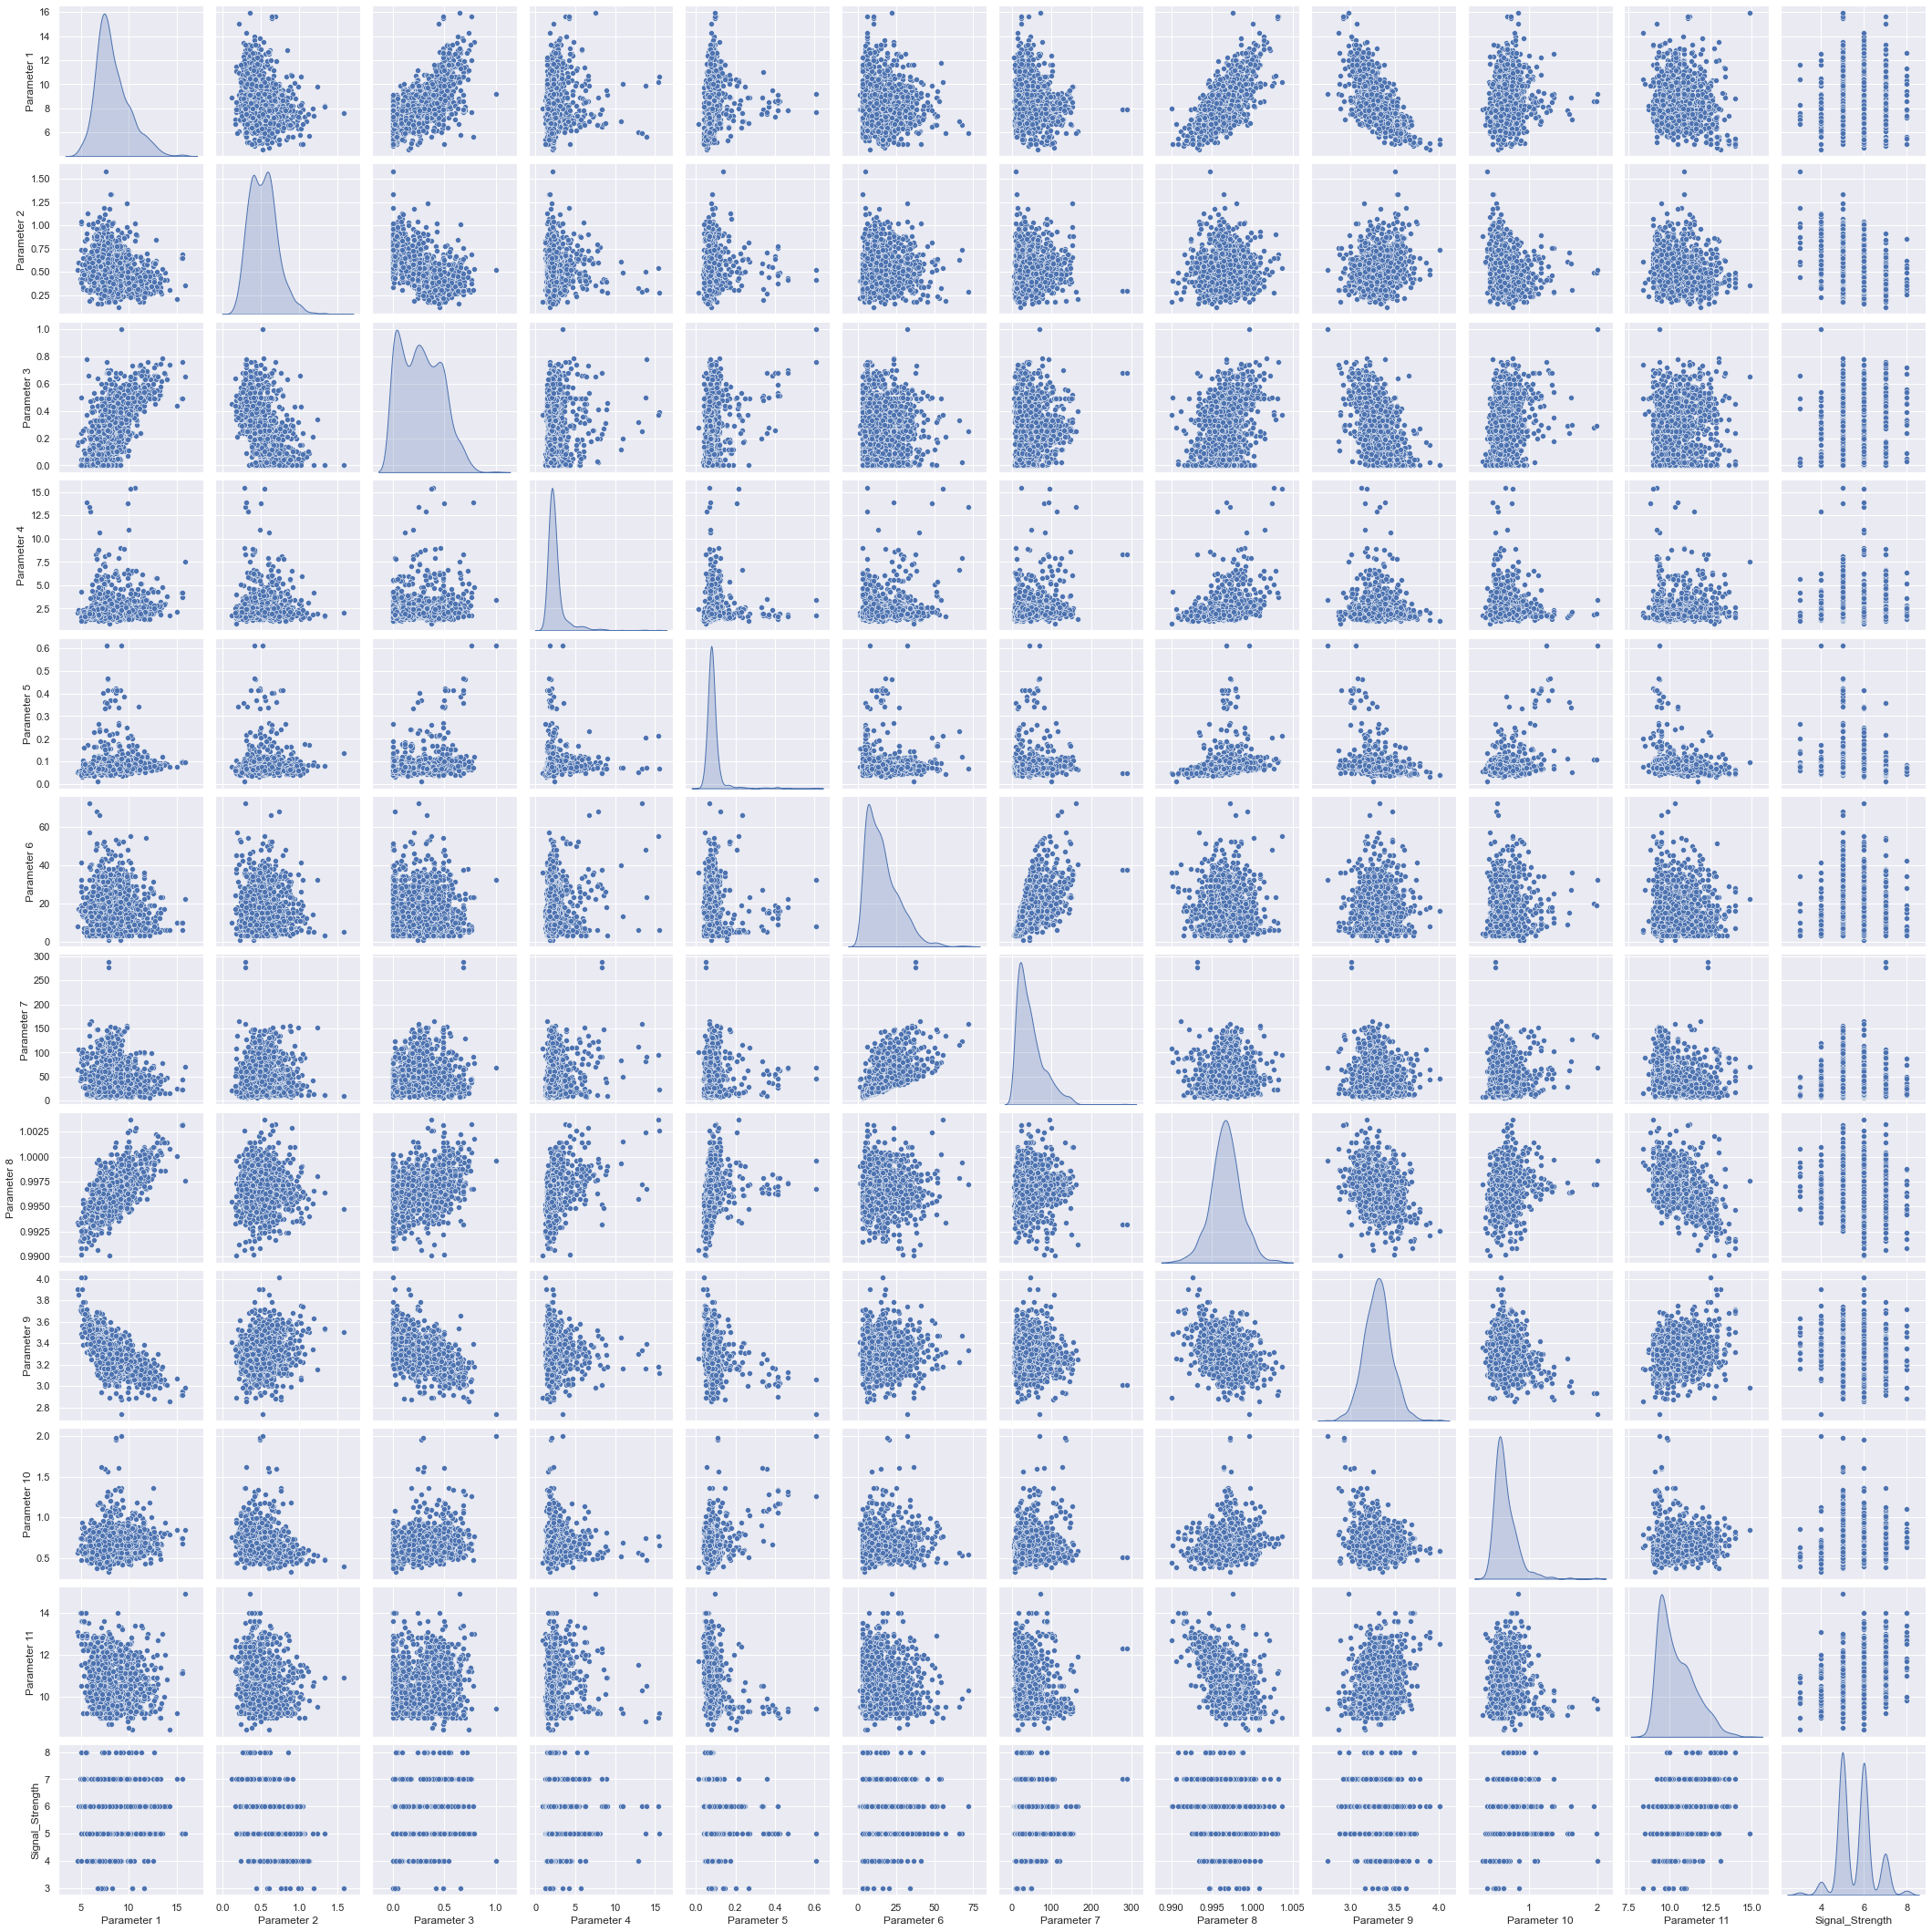

In [27]:
sns.pairplot(Signals, diag_kind = 'kde')
plt.show()

In [28]:
# Parameter 6 and Parameter 7 are highy correlated to each other though they exhibit no correlation with other parameters. 

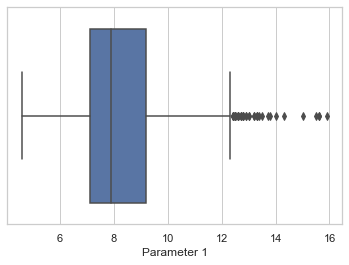

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1359  rows in data, number of outliers are: 41


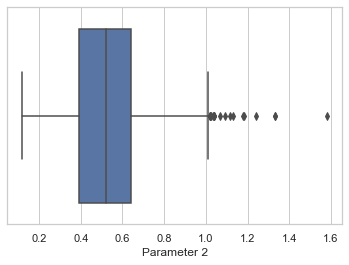

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1359  rows in data, number of outliers are: 19


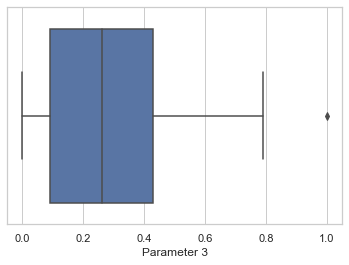

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.43
IQR is: 0.33999999999999997
Lower Whisker, Upper Whisker :  -0.42000000000000004 , 0.94
Out of  1359  rows in data, number of outliers are: 1


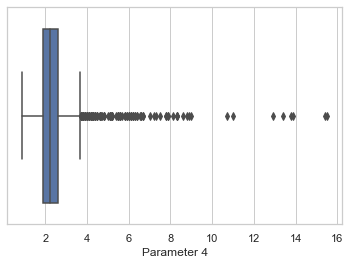

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1359  rows in data, number of outliers are: 126


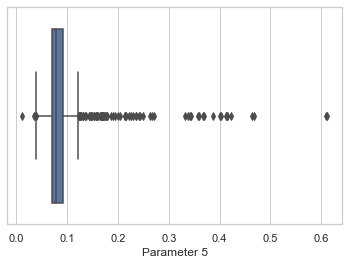

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.091
IQR is: 0.02099999999999999
Lower Whisker, Upper Whisker :  0.03850000000000002 , 0.12249999999999998
Out of  1359  rows in data, number of outliers are: 87


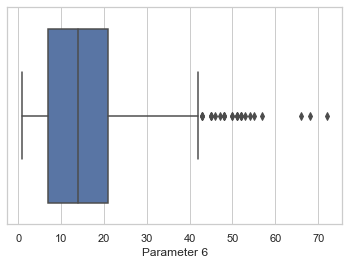

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1359  rows in data, number of outliers are: 26


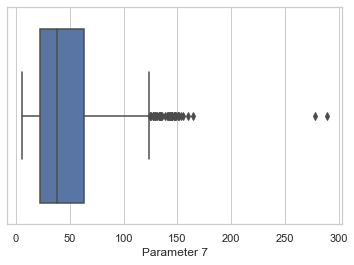

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  63.0
IQR is: 41.0
Lower Whisker, Upper Whisker :  -39.5 , 124.5
Out of  1359  rows in data, number of outliers are: 45


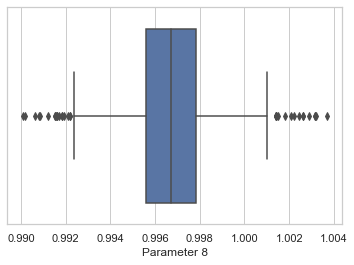

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.9967
Q3 is :  0.99782
IQR is: 0.0022199999999999998
Lower Whisker, Upper Whisker :  0.99227 , 1.00115
Out of  1359  rows in data, number of outliers are: 35


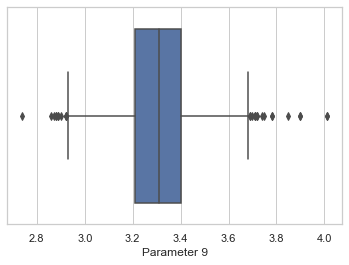

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1359  rows in data, number of outliers are: 28


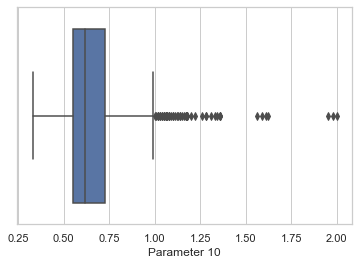

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1359  rows in data, number of outliers are: 55


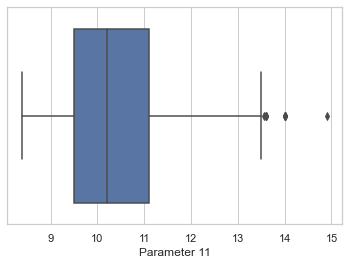

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1359  rows in data, number of outliers are: 12


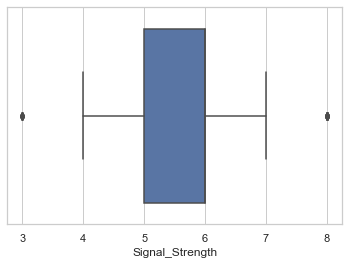

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1359  rows in data, number of outliers are: 27


In [29]:
# Detecting Outliers 
l = len(Signals)
col = list(Signals.columns)
for i in np.arange(len(col)):
    sns.set_theme(style = "whitegrid")
    sns.boxplot(x = Signals[col[i]])
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = Signals[col[i]].quantile(0.25)
    Q2 = Signals[col[i]].quantile(0.50)
    Q3 = Signals[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (Signals[col[i]] < (Q1 - 1.5 *IQR)) |(Signals[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

In [30]:
# Parameter 4 has the maximum number of outliers of 126. 

In [31]:
#  Function to treat outliers
def detect_treate_outliers(df,operation):
    cols = []
    IQR_list = []
    lower_boundary_list = []
    upper_boundary_list = []
    outliers_count = []
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
   # print('cols=',cols)
   # print('IQR_list=',IQR_list)
   # print('lower_boundary_list=',lower_boundary_list)
   # print('upper_boundary_list=',upper_boundary_list)
   # print('outliers_count=',outliers_count)
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    #print('Data=',ndf)
    #print('Columns having outliers=',cols)
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [32]:
# Removing outliers 
count,df = detect_treate_outliers(Signals,'update')
if count>0:
    print('Updating dataset')
    Signals = df

Updating dataset


<AxesSubplot:>

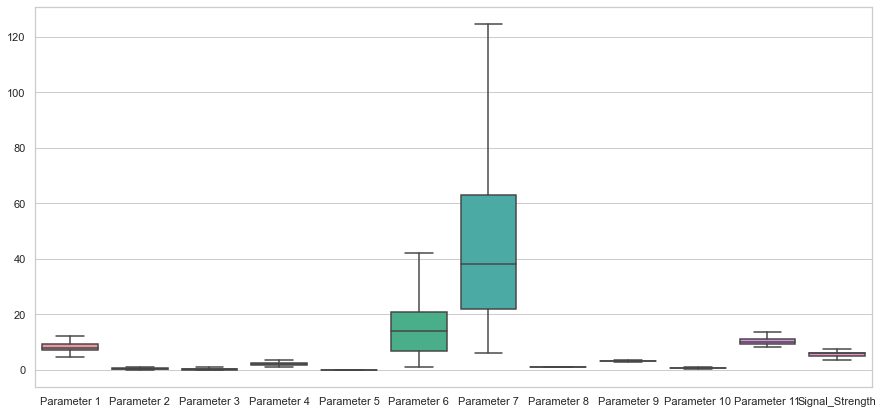

In [33]:
# Post removal of outliers
sns.set_theme(style = "whitegrid")
ax = plt.subplots(figsize = (15,7))
sns.boxplot(data = Signals)

In [34]:
# All outliers are removed from the dataset. 

In [35]:
# Q 2(A)
# Split the data into X & Y

In [36]:
# Solution 
X = Signals.drop(labels = "Signal_Strength", axis = 1)
Y = Signals["Signal_Strength"]  

In [37]:
# Q 2(B)
# Split the data into train & test with 70:30 proportion.

In [38]:
# Solution
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7) 
# Splitting X_train and Y_train data further into validation sets with train validation ratio of 70:30
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.30, random_state = 7)

In [39]:
# Q 2(C)
# Print shape of all the 4 variables and verify if train and test data is in sync

In [40]:
# Solution 
print(X_train.shape) 
print(Y_train.shape)
print(X_test.shape) 
print(Y_test.shape)

(665, 11)
(665,)
(408, 11)
(408,)


In [41]:
# The dimensions of train data and test data are in sync. 

In [42]:
# Q 2(D)
# Normalise the train and test data with appropriate method.

In [43]:
# Solution
from scipy.stats import zscore 

In [44]:
# Normalising the independent train data
norm_train_cols = X_train.columns
norm_train_cols
X_train[norm_train_cols] = X_train[norm_train_cols].apply(zscore)

In [45]:
 X_train.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
680,2.600871,-0.524244,1.632547,-0.669510,-0.627699,-0.036021,-0.148251,2.231614,-1.711623,-1.137284,-1.375842
1305,-0.446984,0.517197,-0.041457,-0.669510,-0.456438,0.893217,1.443468,-0.282316,-0.084710,-0.847710,-0.622150
1575,-0.446984,-0.003524,0.690920,-0.161457,-1.198568,-0.345767,-0.811468,-1.092882,-0.355862,-0.051383,1.262080
1576,-0.132772,-1.276397,1.894110,-1.177563,0.000258,0.067228,-0.513020,-0.423284,-0.084710,0.962124,0.319965
336,0.432809,-0.524244,0.952483,-0.669510,-1.655263,-0.965259,-0.944111,-1.057640,0.254231,0.382977,1.921561


In [46]:
# Normalising the independent test data
norm_test_cols = X_test.columns
norm_test_cols
X_test[norm_test_cols] = X_test[norm_test_cols].apply(zscore)

In [47]:
X_test.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
700,1.284348,2.695903,0.767123,0.917976,-0.274311,0.989146,1.287459,0.850829,-1.468490,-0.593074,-0.261444
1220,1.455968,-1.143723,1.217607,-0.865521,2.138403,0.093316,-0.111050,0.289263,-0.173814,0.883279,0.998960
1585,-0.660682,-0.756998,0.817177,0.431568,-0.793174,0.590999,0.016087,-0.982210,-0.044346,1.400002,0.998960
1027,-1.118336,1.480482,-1.385189,-0.216976,-0.845060,1.188220,0.143224,-1.596755,1.185597,-0.962162,1.088989
15,0.311833,0.513670,-0.434167,2.133997,2.138403,2.581734,2.447586,0.956785,-0.885886,2.064361,-1.071704


In [48]:
# Normalising the independent validation data too
norm_val_cols = X_val.columns
norm_val_cols
X_val[norm_val_cols] = X_val[norm_val_cols].apply(zscore)

In [49]:
X_val.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
286,2.185103,-0.531089,1.382400,-0.600438,-0.469823,0.901231,0.036087,1.542027,-1.368272,0.753068,-0.106779
1562,-0.690247,0.826817,-0.737256,-0.600438,-0.315582,-0.410484,-0.886263,-0.734647,-0.090199,-0.841247,-0.301190
1115,-0.810054,0.799105,-1.040064,0.195692,0.455621,-0.107781,-0.854457,-0.595040,0.515204,-0.406434,0.865278
1026,-0.270926,-1.307036,0.221636,-0.759664,-0.829718,-0.208682,-0.377380,-1.711899,0.717005,-0.696309,2.128952
134,-0.270926,2.600410,-1.141000,-0.281986,0.095726,-0.309583,-0.600016,-0.498389,-0.561068,-0.768778,-0.495602


In [50]:
# Q 2(E)
# Transform Labels into format acceptable by Neural Network. 

In [51]:
# Solution 
# Convert class vectors (integers) to binary class matrix
Y_train = to_categorical(Y_train, num_classes = 9) 
Y_test = to_categorical(Y_test, num_classes = 9)
Y_val = to_categorical(Y_val, num_classes = 9)

In [52]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(665, 9)
(408, 9)
(286, 9)


In [53]:
# Q 3(A)
# Design a Neural Network to train a classifier

In [54]:
# Each signal strength (output) is impacted by 11 parameters (inputs)
# The network requires an input layer comprising 11 inputs (parameters) specified through the “input_dim” argument in the 
# first hidden layer 

In [55]:
print (X_train.shape[1])
print (Y_train.shape[1])
print (Y_val.shape[1])

11
9
9


In [56]:
# Designing the Neural Network architecture 
output_nodes = 9
hidden_nodes = 10
#model
model = Sequential()
tensorflow.random.set_seed(7)
model.add(Dense(hidden_nodes, input_shape = (11,), activation = 'relu'))  
model.add(BatchNormalization())
model.add(Dense(hidden_nodes, activation = 'relu'))
model.add(Dense(output_nodes, activation = 'softmax', kernel_regularizer = regularizers.L2(l2 = 1e-4)))
# Compiling the model
adam = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer  = 'adam', metrics = ['accuracy']) 
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20, verbose = 1)

In [57]:
# Q 3(B)
# Train the classifier using previously designed Architecture

In [58]:
M1 = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 1000, 
                    callbacks = [stop_early])

Epoch 1/1000
21/21 [==============================] - 0s 12ms/step - loss: 2.8137 - accuracy: 0.0436 - val_loss: 2.3165 - val_accuracy: 0.1119
Epoch 2/1000
21/21 [==============================] - 0s 3ms/step - loss: 2.5567 - accuracy: 0.0737 - val_loss: 2.2356 - val_accuracy: 0.1294
Epoch 3/1000
21/21 [==============================] - 0s 3ms/step - loss: 2.3729 - accuracy: 0.0992 - val_loss: 2.1659 - val_accuracy: 0.1748
Epoch 4/1000
21/21 [==============================] - 0s 3ms/step - loss: 2.2414 - accuracy: 0.1263 - val_loss: 2.1028 - val_accuracy: 0.2133
Epoch 5/1000
21/21 [==============================] - 0s 3ms/step - loss: 2.1369 - accuracy: 0.1744 - val_loss: 2.0411 - val_accuracy: 0.2727
Epoch 6/1000
21/21 [==============================] - 0s 3ms/step - loss: 2.0433 - accuracy: 0.2150 - val_loss: 1.9790 - val_accuracy: 0.3601
Epoch 7/1000
21/21 [==============================] - 0s 3ms/step - loss: 1.9653 - accuracy: 0.2842 - val_loss: 1.9125 - val_accuracy: 0.4301
Epoch

In [59]:
score_train = model.evaluate(X_train, Y_train, verbose = 0)
print(model.metrics_names)
print(score_train)

['loss', 'accuracy']
[0.7959175109863281, 0.6496240496635437]


In [60]:
score_validation = model.evaluate(X_val, Y_val, verbose = 0)
print(model.metrics_names)
print(score_validation)

['loss', 'accuracy']
[1.0058408975601196, 0.6048951148986816]


In [61]:
score_test = model.evaluate(X_test, Y_test, verbose = 0)
print(model.metrics_names)
print(score_test)

['loss', 'accuracy']
[0.9862127900123596, 0.5588235259056091]


In [62]:
# Q 3(C)
# Plot 2 separate visuals. 
# i. Training Loss and Validation Loss
# ii. Training Accuracy and Validation Accuracy

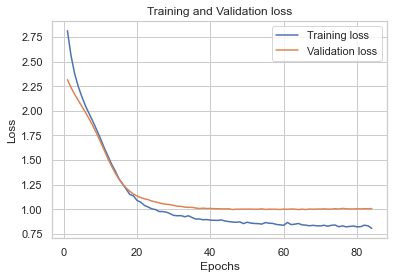

In [63]:
# Solution
# Training Loss and Validation Loss
train_loss = M1.history['loss']
val_loss = M1.history['val_loss']
epochs = range(1,85)
plt.plot(epochs, train_loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

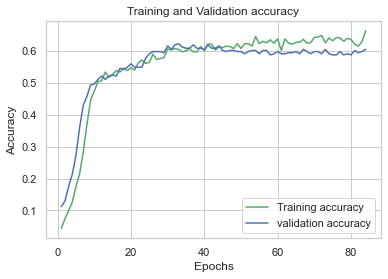

In [64]:
# Training Accuracy and Validation Accuracy
train_accuracy = M1.history['accuracy']
val_accuracy = M1.history['val_accuracy']
epochs = range(1,85)
plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
# Q 3(D)
# Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [66]:
# Solution
# Hyper-parameter tuning 

In [67]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [1]:
import keras_tuner as kt
from keras_tuner import RandomSearch

ModuleNotFoundError: No module named 'keras_tuner'

In [69]:
output_nodes = 9
hidden_nodes = 10
def build_model(hp):  
    model = keras.Sequential()
    tensorflow.random.set_seed(7)
    hp_units = hp.Int('units', min_value = 10, max_value = 50)  
    model.add(Dense(units = hp_units, input_shape = (11,), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(keras.layers.Dense(units = hp_units, activation='relu'))
    hp_lambda = hp.Choice('l2', values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
    model.add(keras.layers.Dense(output_nodes, activation = 'softmax', kernel_regularizer = regularizers.L2(l2 = hp_lambda)))
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
    # Compiling the model
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.CategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])
    return model 

In [70]:
# Using Hyperband tuner for hyper-parameter tuning 
tuner1 = kt.Hyperband(build_model,
                     objective ='val_accuracy',
                     max_epochs = 1000 ,
                     factor = 3,
                     seed = 7
                    )
# Early stopping 
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20, verbose = 1)
tuner1.search(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 1000, callbacks = [stop_early])

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
INFO:tensorflow:Oracle triggered exit


In [71]:
best_hps_1 = tuner1.get_best_hyperparameters(num_trials = 1)[0]

In [72]:
# Building the model with the optimal hyperparameters and train it on the data for 1000 epochs
model = tuner1.hypermodel.build(best_hps_1)
tensorflow.random.set_seed(7)
history_1 = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 1000)
val_acc_per_epoch = history_1.history['val_accuracy']
best_epoch_1 = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch_1,))

Epoch 1/1000
21/21 [==============================] - 0s 11ms/step - loss: 2.0640 - accuracy: 0.4376 - val_loss: 1.9275 - val_accuracy: 0.5559
Epoch 2/1000
21/21 [==============================] - 0s 3ms/step - loss: 1.8733 - accuracy: 0.5414 - val_loss: 1.8722 - val_accuracy: 0.5629
Epoch 3/1000
21/21 [==============================] - 0s 3ms/step - loss: 1.8148 - accuracy: 0.5910 - val_loss: 1.8406 - val_accuracy: 0.6189
Epoch 4/1000
21/21 [==============================] - 0s 3ms/step - loss: 1.7898 - accuracy: 0.5970 - val_loss: 1.8071 - val_accuracy: 0.6189
Epoch 5/1000
21/21 [==============================] - 0s 3ms/step - loss: 1.7796 - accuracy: 0.6150 - val_loss: 1.8091 - val_accuracy: 0.5944
Epoch 6/1000
21/21 [==============================] - 0s 3ms/step - loss: 1.7708 - accuracy: 0.6165 - val_loss: 1.7834 - val_accuracy: 0.6189
Epoch 7/1000
21/21 [==============================] - 0s 3ms/step - loss: 1.7722 - accuracy: 0.6135 - val_loss: 1.7975 - val_accuracy: 0.5874
Epoch

In [73]:
# Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
hypermodel_1 = tuner1.hypermodel.build(best_hps_1)
# Retrain the model
Hypermodel_1 = hypermodel_1.fit(X_train, Y_train, epochs = best_epoch_1, validation_data = (X_val, Y_val))

Epoch 1/13
21/21 [==============================] - 0s 10ms/step - loss: 2.0640 - accuracy: 0.4376 - val_loss: 1.9275 - val_accuracy: 0.5559
Epoch 2/13
21/21 [==============================] - 0s 3ms/step - loss: 1.8733 - accuracy: 0.5414 - val_loss: 1.8722 - val_accuracy: 0.5629
Epoch 3/13
21/21 [==============================] - 0s 3ms/step - loss: 1.8148 - accuracy: 0.5910 - val_loss: 1.8406 - val_accuracy: 0.6189
Epoch 4/13
21/21 [==============================] - 0s 3ms/step - loss: 1.7898 - accuracy: 0.5970 - val_loss: 1.8071 - val_accuracy: 0.6189
Epoch 5/13
21/21 [==============================] - 0s 3ms/step - loss: 1.7796 - accuracy: 0.6150 - val_loss: 1.8091 - val_accuracy: 0.5944
Epoch 6/13
21/21 [==============================] - 0s 3ms/step - loss: 1.7708 - accuracy: 0.6165 - val_loss: 1.7834 - val_accuracy: 0.6189
Epoch 7/13
21/21 [==============================] - 0s 3ms/step - loss: 1.7722 - accuracy: 0.6135 - val_loss: 1.7975 - val_accuracy: 0.5874
Epoch 8/13
21/21 [=

In [74]:
# Evaluating on training data 
eval_result = hypermodel_1.evaluate(X_train, Y_train)
print("[training loss, training accuracy]:", eval_result)

21/21 [==============================] - 0s 2ms/step - loss: 1.7327 - accuracy: 0.6496
[training loss, training accuracy]: [1.732744574546814, 0.6496240496635437]


In [75]:
# Evaluating on validation data 
eval_result = hypermodel_1.evaluate(X_val, Y_val)
print("[validation loss, validation accuracy]:", eval_result)

9/9 [==============================] - 0s 749us/step - loss: 1.7675 - accuracy: 0.6294
[validation loss, validation accuracy]: [1.767520785331726, 0.6293706297874451]


In [76]:
# Evaluating on test data 
eval_result = hypermodel_1.evaluate(X_test, Y_test)
print("[test loss, test accuracy]:", eval_result)

13/13 [==============================] - 0s 997us/step - loss: 1.7852 - accuracy: 0.5980
[test loss, test accuracy]: [1.785244107246399, 0.5980392098426819]


In [77]:
# Observation: 
# Pre Hyper-parameter tuning: 
# The model accuracy on training data and validation data is 64.96% and 60.49% respectively 
# Post Hyper-parameter tuning: 
# The model accuracy on training data and validation data is 64.96% and 62.94% respectively. 
# This represents a marginal improvement of 2% in validation accuracy  

In [78]:
# Q 3(E)
# Plot visuals as in Q3.C and share insights about difference observed in both the models. 

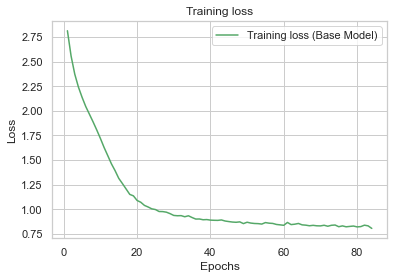

In [79]:
# ANN model 
# Training loss (Base Model)
train_loss_model = M1.history ['loss']
epochs = range(1,85)
plt.plot(epochs, train_loss_model, 'g', label = 'Training loss (Base Model)')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

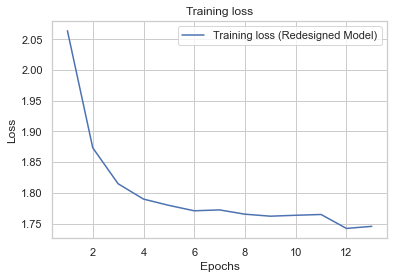

In [80]:
# Training loss (Redesigned model)
train_loss_model = Hypermodel_1.history['loss']
epochs = range(1,14)
plt.plot(epochs, train_loss_model, 'b', label = 'Training loss (Redesigned Model)')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

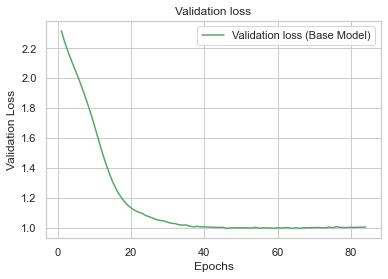

In [81]:
# Validation loss (Base Model)
Validation_loss_model = M1.history ['val_loss']
epochs = range(1,85)
plt.plot(epochs, Validation_loss_model, 'g', label = 'Validation loss (Base Model)')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

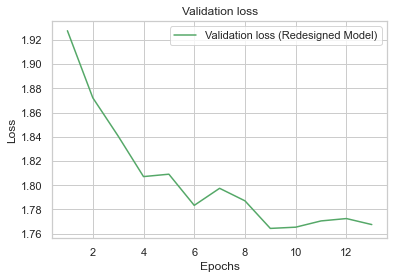

In [82]:
# Validation loss (Redesigned model)
Validation_loss_model = Hypermodel_1.history ['val_loss']
epochs = range(1,14)
plt.plot(epochs, Validation_loss_model, 'g', label = 'Validation loss (Redesigned Model)')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

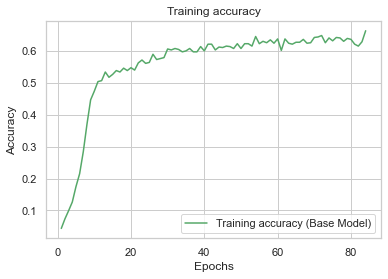

In [83]:
# Training accuracy (Base Model) 
train_accuracy_model = M1.history ['accuracy']
epochs = range(1,85)
plt.plot(epochs, train_accuracy_model, 'g', label = 'Training accuracy (Base Model)')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

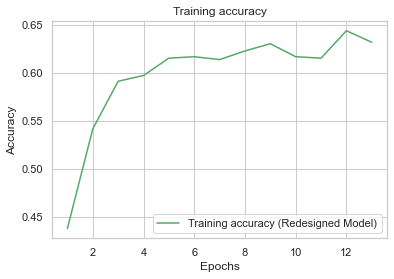

In [84]:
# Training accuracy (Redesigned Model) 
train_accuracy_model = Hypermodel_1.history ['accuracy']
epochs = range(1,14)
plt.plot(epochs, train_accuracy_model, 'g', label = 'Training accuracy (Redesigned Model)')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

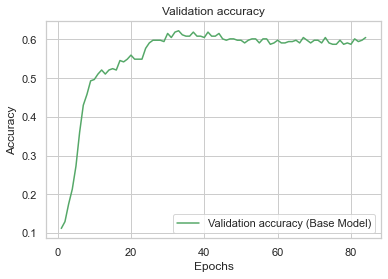

In [85]:
# Validation accuracy (Base Model)
validation_accuracy_model = M1.history ['val_accuracy']
epochs = range(1,85)
plt.plot(epochs, validation_accuracy_model, 'g', label = 'Validation accuracy (Base Model)')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

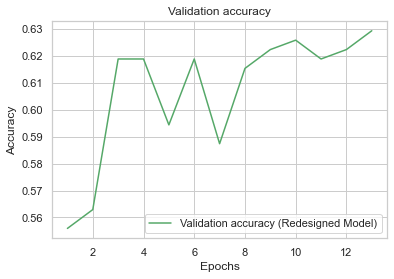

In [86]:
# Validation accuracy (Redesigned Model)
validation_accuracy_model = Hypermodel_1.history ['val_accuracy']
epochs = range(1,14)
plt.plot(epochs, validation_accuracy_model, 'g', label = 'Validation accuracy (Redesigned Model)')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [87]:
# Relative to the base model, the redesigned model post hyper-parameter tuning required fewer number of epochs (iteractions) 
# to achieve the optima cost (error/loss).  

In [88]:
# Part B
# DOMAIN: Autonomous Vehicles

In [89]:
# Project objective 
# To build a digit classifier on the SVHN (Street View Housing Number) dataset.

In [90]:
# Importing the required libraries
import h5py
import glob
from IPython.display import Image  
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [91]:
# Q 1(A)
# Read the .h5 file and assign to a variable.

In [92]:
# Solution

In [93]:
filename = "Autonomous_Vehicles_SVHN_single_grey1.h5"
h5f = h5py.File (filename, "r")

In [94]:
# Q 1(B)
# Print all the keys from the .h5 file.

In [95]:
with h5py.File(filename, "r") as h5f:
    print("Keys: %s" % h5f.keys())

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [96]:
# Q 1(C)
# Split the data into X_train, X_test, Y_train, Y_test

In [97]:
# Solution
# Split between train and test sets
with h5py.File(filename, "r") as h5f:
    x_train = h5f['X_train'][:]
    y_train = h5f['y_train'][:]
    x_test = h5f['X_test'][:]
    y_test = h5f['y_test'][:]

In [98]:
# Q 2(A)
# Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [99]:
with h5py.File(filename, "r") as h5f:
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [100]:
# The dimensions of X_train and X_test are in sync. 
# The dimensions of Y_train and Y_test are in sync too. 

In [101]:
# Q 2(B)
# Visualise first 10 images in train data and print its corresponding labels.

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


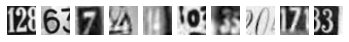

In [102]:
# Solution 
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % ((y_train[i])))
plt.show()

In [103]:
# Q 2(C)
# Reshape all the images with appropriate shape update the data in same variable

In [104]:
# Solution
# Reshape 2D - 32*32 into 1D - 1024
with h5py.File(filename, "r") as h5f:
    x_val = h5f['X_val'][:]
    x_train = x_train.reshape(42000, 32*32)
    x_val= x_val.reshape(x_val.shape[0], 32*32)
    x_test = x_test.reshape(x_test.shape[0],32*32)

In [105]:
with h5py.File(filename, "r") as h5f:
    print(x_train.shape)
    print(x_val.shape)
    print(x_test.shape)

(42000, 1024)
(60000, 1024)
(18000, 1024)


In [106]:
# Q 2(D)
# Normalise the images i.e. Normalise the pixel values.

In [107]:
# Solution
# Minimum values 
with h5py.File(filename, "r") as h5f:
    print(x_train.min())
    print(x_val.min())
    print(x_test.min())

0.0
0.0
0.0


In [108]:
# Maximum values 
with h5py.File(filename, "r") as h5f:
    print(x_train.max())
    print(x_val.max())
    print(x_test.max())

254.9745
254.9745
254.9745


In [109]:
with h5py.File(filename, "r") as h5f:
    max_x_train = x_train.max()
    max_x_val = x_val.max()
    max_x_test = x_test.max()

In [110]:
# Normalisation
x_train = x_train/max_x_train
x_val = x_val/max_x_val
x_test = x_test/max_x_test

In [111]:
# Post normalisation
# Minimum values 
with h5py.File(filename, "r") as h5f:
    print(x_train.min())
    print(x_val.min())
    print(x_test.min())

0.0
0.0
0.0


In [112]:
# Maximum values 
with h5py.File(filename, "r") as h5f:
    print(x_train.max())
    print(x_val.max())
    print(x_test.max())

1.0
1.0
1.0


In [113]:
# Q 2(E)
# Transform Labels into format acceptable by Neural Network

In [114]:
# Solution
# One hot encoding 
with h5py.File(filename, "r") as h5f:
    y_val = h5f['y_val'][:]
    y_train = to_categorical(y_train,num_classes = 10)
    y_val = to_categorical(y_val,num_classes = 10)
    y_test = to_categorical(y_test, num_classes = 10)

In [115]:
# Q 2(F)
# Print total Number of classes in the Dataset.

In [116]:
# Solution
with h5py.File(filename, "r") as h5f:
    print(y_train.shape)
    print(y_val.shape)
    print(y_test.shape)

(42000, 10)
(60000, 10)
(18000, 10)


In [117]:
# The total number of classes in the dataset is 10

In [118]:
# Q 3(A)
# Design a Neural Network to train a classifier.

In [119]:
# Solution
# Designing a Neural Network architecture 
output_nodes = 10
hidden_nodes = 256
# For early stopping of model.
callbacks = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20, verbose = 1)
# Model
model = Sequential()
tensorflow.random.set_seed(7)
model.add(Dense(500, input_shape = (1024,), activation = 'relu'))  
model.add(BatchNormalization())
model.add(Dense(hidden_nodes,activation = 'relu'))
model.add(Dense(hidden_nodes,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(hidden_nodes,activation = 'relu'))
model.add(Dense(hidden_nodes,activation = 'relu'))
# 'model.add(Dropout(0.5))
model.add(Dense(hidden_nodes,activation = 'relu'))
model.add(Dense(hidden_nodes,activation ='relu'))
model.add(Dense(output_nodes, activation = 'softmax', kernel_regularizer = regularizers.L2(l2 = 1e-4)))
# Compiling the model
adam = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001) 
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy']) 

In [120]:
# Q 3(B)
# Train the classifier using previously designed Architecture (Use best suitable parameters)

In [121]:
# Training the model 
M3 = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 1000, batch_size = 500, 
          verbose = 1, callbacks = [callbacks])

Epoch 1/1000
84/84 [==============================] - 4s 46ms/step - loss: 2.3044 - accuracy: 0.1140 - val_loss: 2.2994 - val_accuracy: 0.1351
Epoch 2/1000
84/84 [==============================] - 4s 46ms/step - loss: 2.1997 - accuracy: 0.1928 - val_loss: 2.1159 - val_accuracy: 0.3078
Epoch 3/1000
84/84 [==============================] - 4s 44ms/step - loss: 1.7573 - accuracy: 0.3643 - val_loss: 1.7202 - val_accuracy: 0.4494
Epoch 4/1000
84/84 [==============================] - 4s 47ms/step - loss: 1.4692 - accuracy: 0.4917 - val_loss: 1.3924 - val_accuracy: 0.5560
Epoch 5/1000
84/84 [==============================] - 4s 45ms/step - loss: 1.2677 - accuracy: 0.5710 - val_loss: 1.1698 - val_accuracy: 0.6161
Epoch 6/1000
84/84 [==============================] - 4s 44ms/step - loss: 1.1455 - accuracy: 0.6211 - val_loss: 1.0688 - val_accuracy: 0.6446
Epoch 7/1000
84/84 [==============================] - 4s 45ms/step - loss: 1.0521 - accuracy: 0.6600 - val_loss: 0.9725 - val_accuracy: 0.6831

In [122]:
# Q 3(C)
# Evaluate performance of the model with appropriate metrics

In [123]:
# Solution
# Evaluating on train data 
eval_result = model.evaluate(x_train, y_train)
print("[train loss, train accuracy]:", eval_result)

1313/1313 [==============================] - 5s 3ms/step - loss: 0.3084 - accuracy: 0.9018
[train loss, train accuracy]: [0.3084336221218109, 0.9018333554267883]


In [124]:
# Evaluating on train data 
eval_result = model.evaluate(x_val, y_val)
print("[validation loss, validation accuracy]:", eval_result)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4352 - accuracy: 0.8767
[validation loss, validation accuracy]: [0.43521514534950256, 0.876716673374176]


In [125]:
# Evaluating on test data 
eval_result = model.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)

563/563 [==============================] - 2s 3ms/step - loss: 0.7310 - accuracy: 0.8181
[test loss, test accuracy]: [0.7310389876365662, 0.8181111216545105]


In [126]:
# Q 3(D)
# Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs 
# plot and write your observations on the same. 

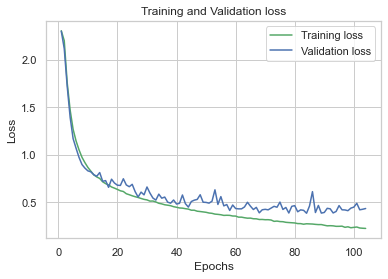

In [127]:
# Solution
# Training loss vs. Validation loss vs the number of epochs
loss_train = M3.history['loss']
loss_val = M3.history['val_loss']
epochs = range(1,105)
plt.plot(epochs, loss_train, 'g', label = 'Training loss')
plt.plot(epochs, loss_val, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

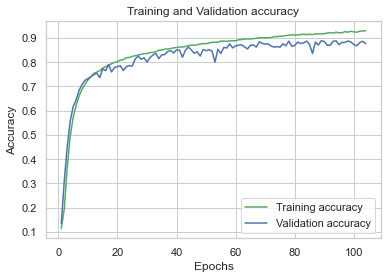

In [128]:
# Training accuracy vs. Validation accuracy vs the number of epochs
acc_train = M3.history['accuracy']
acc_val = M3.history['val_accuracy']
epochs = range(1,105)
plt.plot(epochs, acc_train, 'g', label = 'Training accuracy')
plt.plot(epochs, acc_val, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()